In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
car_dataset = pd.read_csv('car_data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_dataset.info(), car_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(None,
 Car_Name         0
 Year             0
 Selling_Price    0
 Present_Price    0
 Kms_Driven       0
 Fuel_Type        0
 Seller_Type      0
 Transmission     0
 Owner            0
 dtype: int64)

In [7]:
car_dataset.Fuel_Type.value_counts(), car_dataset.Transmission.value_counts(), car_dataset.Seller_Type.value_counts()

(Petrol    239
 Diesel     60
 CNG         2
 Name: Fuel_Type, dtype: int64,
 Manual       261
 Automatic     40
 Name: Transmission, dtype: int64,
 Dealer        195
 Individual    106
 Name: Seller_Type, dtype: int64)

In [8]:
car_dataset.replace({'Fuel_Type':{'Diesel': 0, 'Petrol':1, 'CNG':2}}, inplace=True)
car_dataset.replace({'Transmission':{'Manual': 0, 'Automatic':1}}, inplace=True)
car_dataset.replace({'Seller_Type':{'Individual': 0, 'Dealer':1}}, inplace=True)
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,0,0
1,sx4,2013,4.75,9.54,43000,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,1,1,0,0
3,wagon r,2011,2.85,4.15,5200,1,1,0,0
4,swift,2014,4.60,6.87,42450,0,1,0,0


In [9]:
x = car_dataset.drop(['Car_Name', "Selling_Price"], axis=1)
y = car_dataset['Selling_Price']
x,y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          1            1             0   
 1    2013           9.54       43000          0            1             0   
 2    2017           9.85        6900          1            1             0   
 3    2011           4.15        5200          1            1             0   
 4    2014           6.87       42450          0            1             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          0            1             0   
 297  2015           5.90       60000          1            1             0   
 298  2009          11.00       87934          1            1             0   
 299  2017          12.50        9000          0            1             0   
 300  2016           5.90        5464          1            1             0   
 
      Owner  
 0        0  
 1        0  
 2      

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [11]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
training_data_prediction = lasso_model.predict(x_train)

In [12]:
error = metrics.r2_score(y_train, training_data_prediction)
error

0.8534437888277806

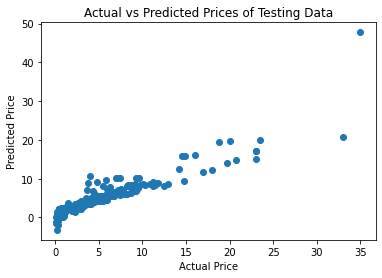

In [13]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices of Testing Data')
plt.show()

In [14]:
testing_data_prediction = lasso_model.predict(x_test)
error_test = metrics.r2_score(y_test, testing_data_prediction)
error_test

0.46123204958260644

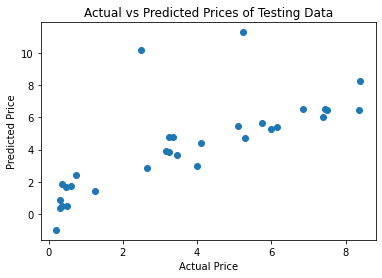

In [15]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices of Testing Data')
plt.show()

In [16]:
input_data = (np.asarray([2014,5.59,27000,1,1,0,0])).reshape(1,-1)
predicted = lasso_model.predict(input_data)
print(predicted)

[3.81564695]


C:\Users\SSID0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [17]:
import pickle

In [21]:
file = 'car_prediction.sav'
pickle.dump(lasso_model, open(file, 'wb'))